In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib
from functools import partial, reduce
from collections import defaultdict, Counter

def compose(*funcs):
    return reduce(lambda f, g: lambda *args: f(*g(*args)), funcs, lambda *args: args)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from sga import *
from operators import *
from mutations import *
from plot import *

In [4]:
opts = {
    8: 134,
    10: 430,
    12: 580,
    13: 1912,
    14: 2320,
    15: 2230,
    16: 8044,
    '16a': 8044,
    20: 7750,
    30: 28706,
}

In [5]:
nug_instance = 12
results = {}


def get_tai_name(n):
    return 'tai{}a'.format(n)


def get_qap_instance_url(name):
    return 'http://anjos.mgi.polymtl.ca/qaplib/data.d/{}.dat'.format(name)


def get_qap_data(nug_instance, get_name=lambda n: 'nug{}'.format(n)):
    qap_instance_file = urllib.urlopen(get_qap_instance_url(get_name(nug_instance)))
    
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Fetching problem size: %d' % n)
    print('OPT: %d' % opts[n])

    A = np.empty((n, n))
    if n <= 30:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    if n != 50:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return A, B


flow, distance = get_qap_data(nug_instance)


Fetching problem size: 12
OPT: 580


In [6]:
results = {}

def q3ap_objective_function(n, A, pq):
    p, q = pq
    flow, distance = A
    distance, flow = A
    s = 0.0
    for i in range(n):
        for j in range(n):
            s += flow[p[i], p[j]] * flow[q[i], q[j]] * distance[i, j]**2
    return s

In [7]:
from sga import *
n = 12
p = np.array([12,7,9,3,4,8,11,1,5,6,10,2]) - 1
print(p)

pq = gen_random_double_sample(n)
flow, distance = get_qap_data(n)
print(q3ap_objective_function(n, (flow, distance), pq))

pq = (p, p)
print(q3ap_objective_function(n, (flow, distance), pq))
pq = [1, 6, 5, 7, 4, 3, 8, 2, 9, 10, 11, 0], [7, 5, 1, 2, 10, 6, 8, 9, 11, 3, 0, 4]
print(q3ap_objective_function(n, (flow, distance), pq))


[11  6  8  2  3  7 10  0  4  5  9  1]
Fetching problem size: 12
OPT: 580
9590.0
5030.0
580.0


In [ ]:
n = 12
flow, distance = get_qap_data(n)
params = {
    'T': 1000,
    'population_size': 10000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.35,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.00,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(4),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results[n] = sga(**params)

plot_sga_results(n, opts, **results[n])

Fetching problem size: 12
OPT: 580
  0     4.00316596 min: 2134.00000000 mean: 4830.06080000 max: 5838.00000000 std: 686.63750808


In [ ]:
n = 14
flow, distance = get_qap_data(n)
params = {
    'T': 1000,
    'population_size': 7000,
    'chromosome_length': n,
    'crossover_probability': 0.85,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(3),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results[n] = sga(**params)

plot_sga_results(n, opts, **results[n])

In [ ]:
problem_name = '16a'
n = 16
flow, distance = get_qap_data(problem_name)
params = {
    'T': 1000,
    'population_size': 5000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(4),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results[n] = sga(**params)

plot_sga_results(problem_name, opts, **results[n])

In [ ]:
n = 20
flow, distance = get_qap_data(n)
params = {
    'T': 2000,
    'population_size': 7000,
    'chromosome_length': n,
    'crossover_probability': 0.85,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(4),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results[n] = sga(**params)

plot_sga_results(n, opts, **results[n])

In [ ]:
n = 30
flow, distance = get_qap_data(n)
params = {
    'T': 3000,
    'population_size': 7000,
    'chromosome_length': n,
    'crossover_probability': 0.85,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': double_pmx_crossover,
    'local_search_probability': 0.0,
    'local_search_k': 3,
    'mutation_operator': k_double_scramble_mutation(5),
    'objective_func': q3ap_objective_function,
    'gen_initial_sample': gen_double_initial_sample,
    'gen_random_sample': gen_random_double_sample,
}

results[n] = sga(**params)

plot_sga_results(n, opts, **results[n])

Results for 12
Min cost: 1042.0
OPT cost: 580
Absolute error: 462.0
costs mean: 122.492
costs std: 367.843028935


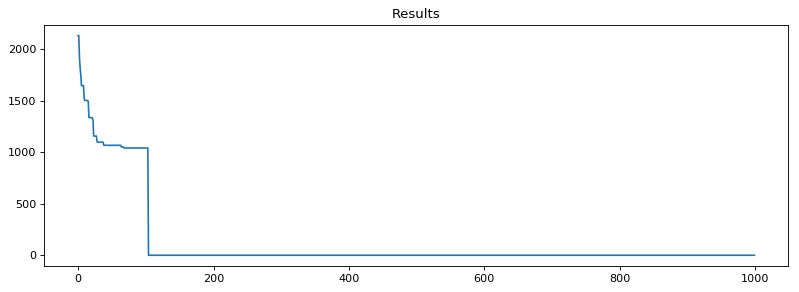

In [26]:
n = 12
plot_sga_results(n, opts, **results[n])

Results for 14
Min cost: 3420.0
OPT cost: 2320
Absolute error: 1100.0
costs mean: 473.94
costs std: 1309.39733786


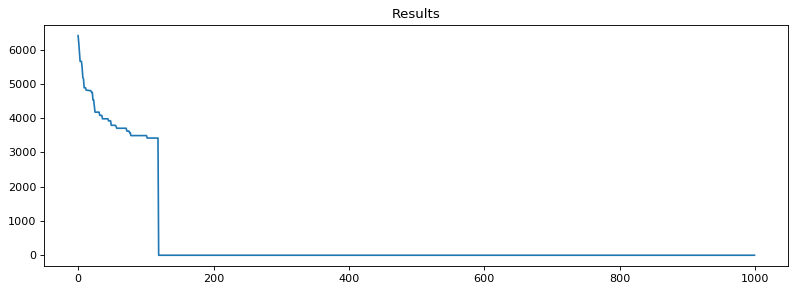

In [27]:
n = 14
plot_sga_results(n, opts, **results[n])

Results for 16
Min cost: 8326.0
OPT cost: 16898
Absolute error: 8572.0
costs mean: 1093.47
costs std: 2984.77773697


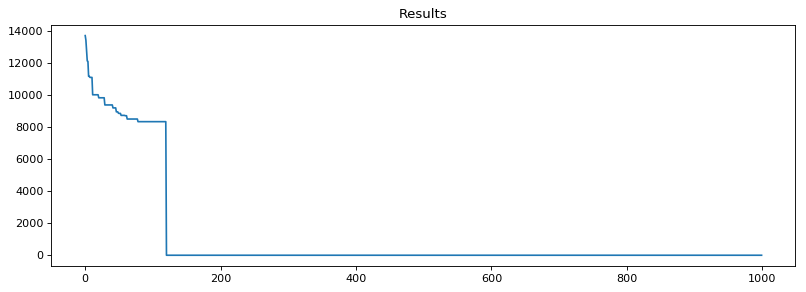

In [28]:
n = 16
plot_sga_results(n, opts, **results[n])

Results for 20
Min cost: 12518.0
OPT cost: 7750
Absolute error: 4768.0
costs mean: 1175.123
costs std: 4014.08031072


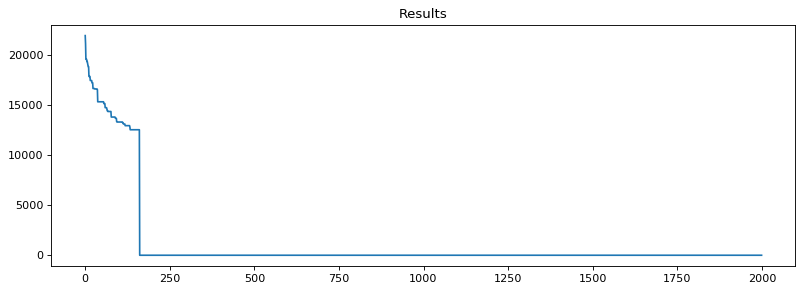

In [29]:
n = 20
plot_sga_results(n, opts, **results[n])

In [1]:
n = 30
plot_sga_results(n, opts, **results[n])

NameError: name 'plot_sga_results' is not defined

[16, 20, 12, 14]
